In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Path to your dataset
json_path = "../FINAL_CORRECTED_MET_TEXTILES_DATASET/objects_with_images_only/ALL_TEXTILES_AND_TAPESTRIES_WITH_IMAGES_20250705_230315.json"

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame for easy analysis
df = pd.DataFrame(data)

# Show available columns
print(df.columns)
df[["objectID", "classification", "department", "title"]].head()

Index(['objectID', 'isHighlight', 'accessionNumber', 'accessionYear',
       'isPublicDomain', 'primaryImage', 'primaryImageSmall',
       'additionalImages', 'constituents', 'department', 'objectName', 'title',
       'culture', 'period', 'dynasty', 'reign', 'portfolio', 'artistRole',
       'artistPrefix', 'artistDisplayName', 'artistDisplayBio', 'artistSuffix',
       'artistAlphaSort', 'artistNationality', 'artistBeginDate',
       'artistEndDate', 'artistGender', 'artistWikidata_URL', 'artistULAN_URL',
       'objectDate', 'objectBeginDate', 'objectEndDate', 'medium',
       'dimensions', 'measurements', 'creditLine', 'geographyType', 'city',
       'state', 'county', 'country', 'region', 'subregion', 'locale', 'locus',
       'excavation', 'river', 'classification', 'rightsAndReproduction',
       'linkResource', 'metadataDate', 'repository', 'objectURL', 'tags',
       'objectWikidata_URL', 'isTimelineWork', 'GalleryNumber'],
      dtype='object')


objectID    classification                              department  \
0    229636    Textiles-Laces  European Sculpture and Decorative Arts   
1    229605  Textiles-Velvets  European Sculpture and Decorative Arts   
2    229642    Textiles-Laces  European Sculpture and Decorative Arts   
3    229639    Textiles-Laces  European Sculpture and Decorative Arts   
4    229667    Textiles-Woven  European Sculpture and Decorative Arts   

                                    title  
0                               Cap crown  
1                                  Length  
2                         Pair of lappets  
3  Two joined lappets and papillon edging  
4                                   Piece

In [2]:
# Show departments for objectIDs in the 20,000–35,000 range
mask = (df["objectID"] >= 20000) & (df["objectID"] <= 35000)
print(df.loc[mask, ["objectID", "classification", "department", "title"]].head(20))

     objectID   classification      department  \
520     25387          Helmets  Arms and Armor   
521     25091  Shafted Weapons  Arms and Armor   
522     25122  Shafted Weapons  Arms and Armor   
523     26685  Shafted Weapons  Arms and Armor   
524     26677  Shafted Weapons  Arms and Armor   
525     26668  Shafted Weapons  Arms and Armor   
526     31122           Swords  Arms and Armor   
527     31095           Swords  Arms and Armor   
528     31006           Swords  Arms and Armor   
529     33578  Shafted Weapons  Arms and Armor   
530     27119        Forgeries  Arms and Armor   
531     27042  Shafted Weapons  Arms and Armor   
532     27047  Shafted Weapons  Arms and Armor   
533     27055  Shafted Weapons  Arms and Armor   
534     27057  Shafted Weapons  Arms and Armor   
535     27081          Helmets  Arms and Armor   
536     25018  Shafted Weapons  Arms and Armor   
537     25015  Shafted Weapons  Arms and Armor   
538     25658  Shafted Weapons  Arms and Armor   


In [3]:
import json

# Load textiles and tapestries objectIDs
with open("../FINAL_CORRECTED_MET_TEXTILES_DATASET/objects_with_images_only/textiles_with_images_20250705_230315.json", "r", encoding="utf-8") as f:
    textiles = json.load(f)
with open("../FINAL_CORRECTED_MET_TEXTILES_DATASET/objects_with_images_only/tapestries_with_images_20250705_230315.json", "r", encoding="utf-8") as f:
    tapestries = json.load(f)

textile_ids = set(obj["objectID"] for obj in textiles)
tapestry_ids = set(obj["objectID"] for obj in tapestries)

In [4]:
def precise_category(row):
    oid = row["objectID"]
    if oid in tapestry_ids:
        return "Tapestry"
    elif oid in textile_ids:
        return "Textile"
    else:
        return "Other"

df["precise_category"] = df.apply(precise_category, axis=1)

In [5]:
def precise_category(row):
    oid = row["objectID"]
    if oid in tapestry_ids:
        return "Tapestry"
    elif oid in textile_ids:
        return "Textile"
    else:
        return "Other"

df["precise_category"] = df.apply(precise_category, axis=1)

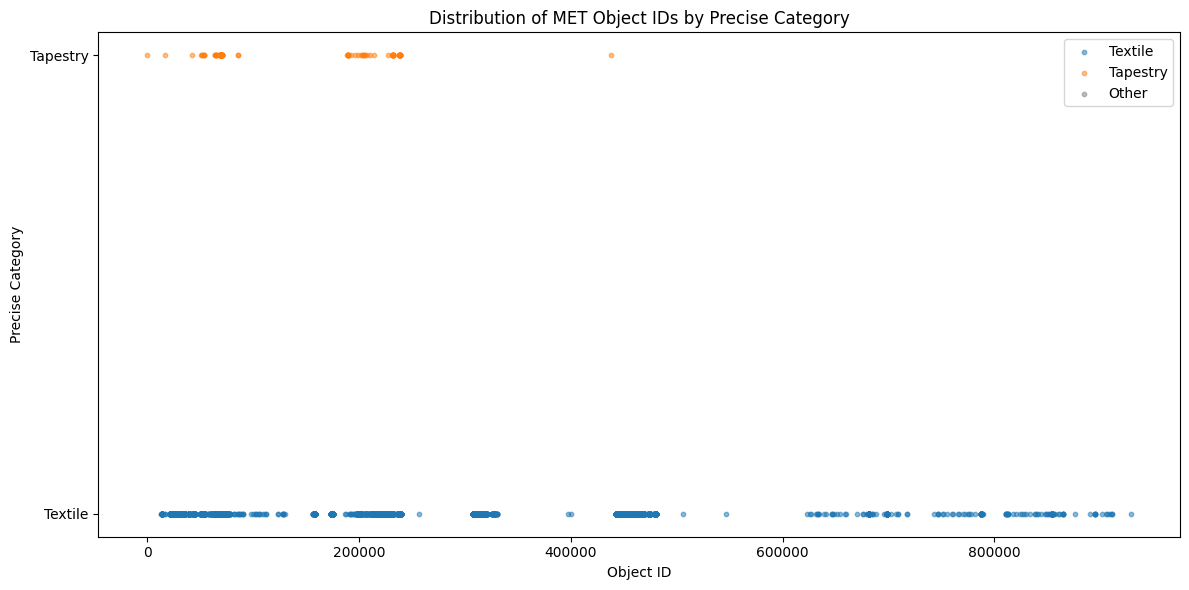

In [6]:
plt.figure(figsize=(12, 6))
for cat, color in zip(["Textile", "Tapestry", "Other"], ["tab:blue", "tab:orange", "tab:gray"]):
    subset = df[df["precise_category"] == cat]
    plt.scatter(subset["objectID"], [cat]*len(subset), label=cat, alpha=0.5, s=10, color=color)

plt.xlabel("Object ID")
plt.ylabel("Precise Category")
plt.title("Distribution of MET Object IDs by Precise Category")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
mask = (df["objectID"] >= 20000) & (df["objectID"] <= 35000)
print(df.loc[mask, ["objectID", "precise_category", "classification", "department", "title"]].head(20))

     objectID precise_category   classification      department  \
520     25387          Textile          Helmets  Arms and Armor   
521     25091          Textile  Shafted Weapons  Arms and Armor   
522     25122          Textile  Shafted Weapons  Arms and Armor   
523     26685          Textile  Shafted Weapons  Arms and Armor   
524     26677          Textile  Shafted Weapons  Arms and Armor   
525     26668          Textile  Shafted Weapons  Arms and Armor   
526     31122          Textile           Swords  Arms and Armor   
527     31095          Textile           Swords  Arms and Armor   
528     31006          Textile           Swords  Arms and Armor   
529     33578          Textile  Shafted Weapons  Arms and Armor   
530     27119          Textile        Forgeries  Arms and Armor   
531     27042          Textile  Shafted Weapons  Arms and Armor   
532     27047          Textile  Shafted Weapons  Arms and Armor   
533     27055          Textile  Shafted Weapons  Arms and Armo

In [8]:
mask = (df["objectID"] >= 20000) & (df["objectID"] <= 35000)
print(df.loc[mask, ["objectID", "precise_category", "classification", "department", "title"]].value_counts("precise_category"))

precise_category
Textile    414
Name: count, dtype: int64


department
European Sculpture and Decorative Arts    15769
Asian Art                                  5504
Islamic Art                                3276
The Michael C. Rockefeller Wing             830
Modern and Contemporary Art                 657
Arms and Armor                              470
Medieval Art                                445
Robert Lehman Collection                    266
The Cloisters                                82
Ancient Near Eastern Art                     43
The American Wing                            20
Costume Institute                             5
Drawings and Prints                           2
Egyptian Art                                  1
Greek and Roman Art                           1
Musical Instruments                           1
European Paintings                            1
Name: count, dtype: int64


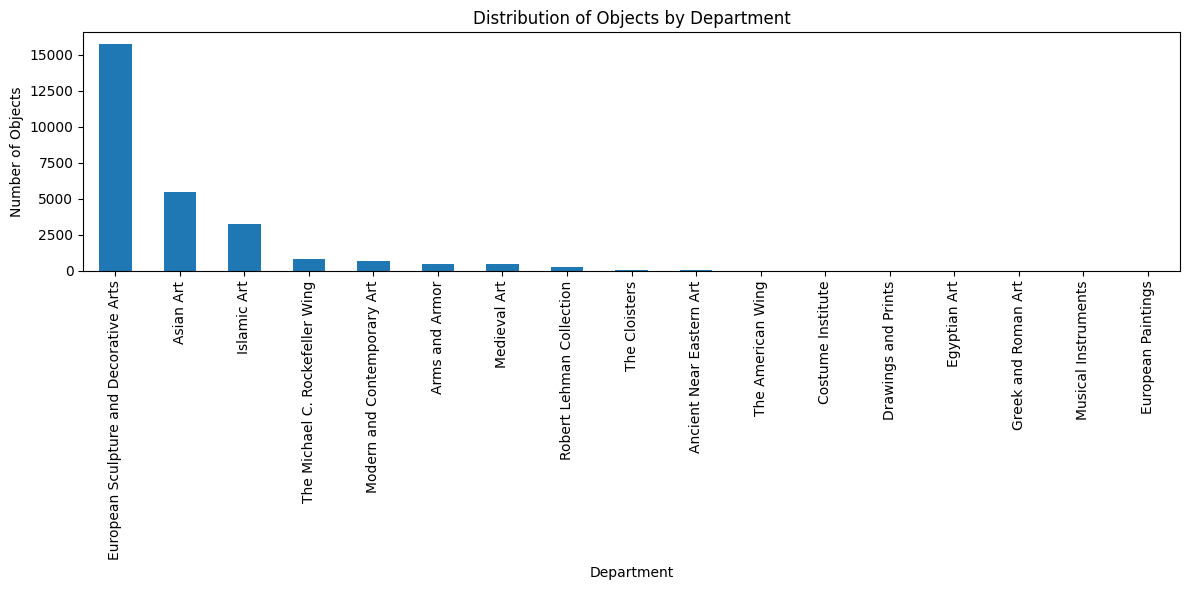

In [9]:
# List all unique departments and their counts
dept_counts = df['department'].value_counts()
print(dept_counts)

# Visualize department distribution
plt.figure(figsize=(12, 6))
dept_counts.plot(kind='bar')
plt.xlabel("Department")
plt.ylabel("Number of Objects")
plt.title("Distribution of Objects by Department")
plt.tight_layout()
plt.show()

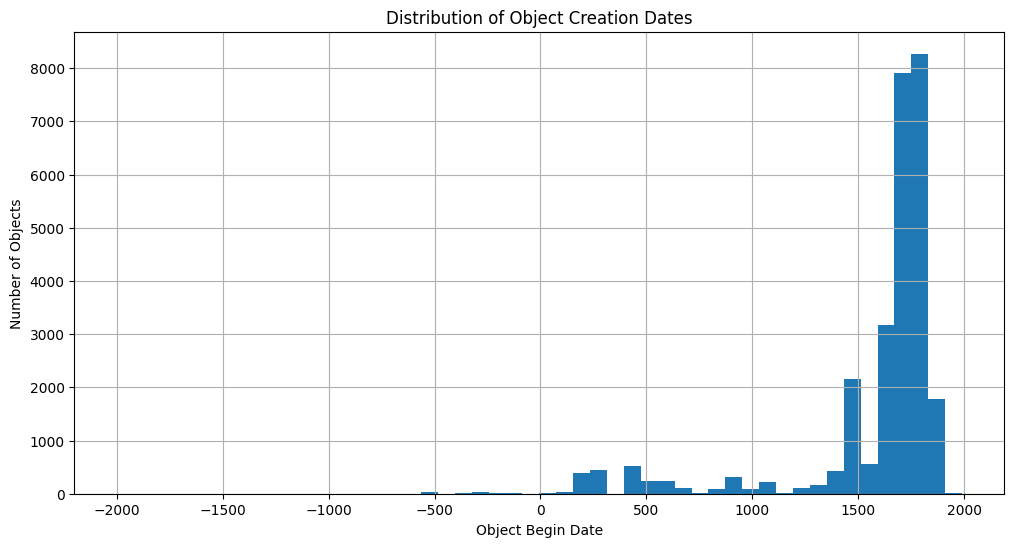

In [10]:
df['objectBeginDate'] = pd.to_numeric(df['objectBeginDate'], errors='coerce')
plt.figure(figsize=(12,6))
df['objectBeginDate'].dropna().astype(int).hist(bins=50)
plt.xlabel("Object Begin Date")
plt.ylabel("Number of Objects")
plt.title("Distribution of Object Creation Dates")
plt.show()

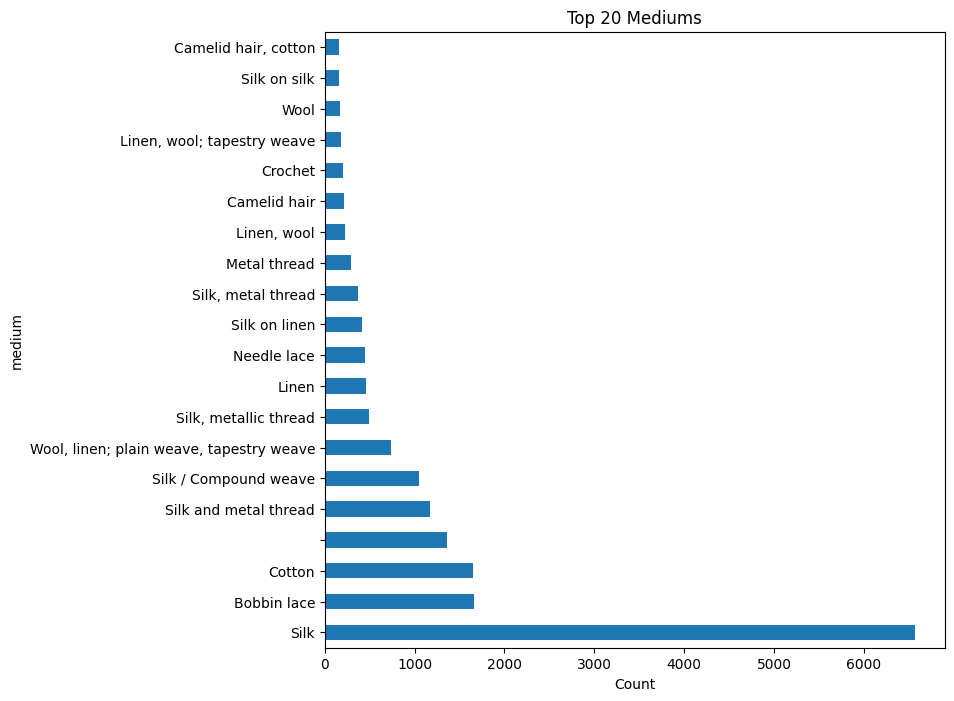

In [11]:
df['medium'].value_counts().head(20).plot(kind='barh', figsize=(8,8))
plt.xlabel("Count")
plt.title("Top 20 Mediums")
plt.show()

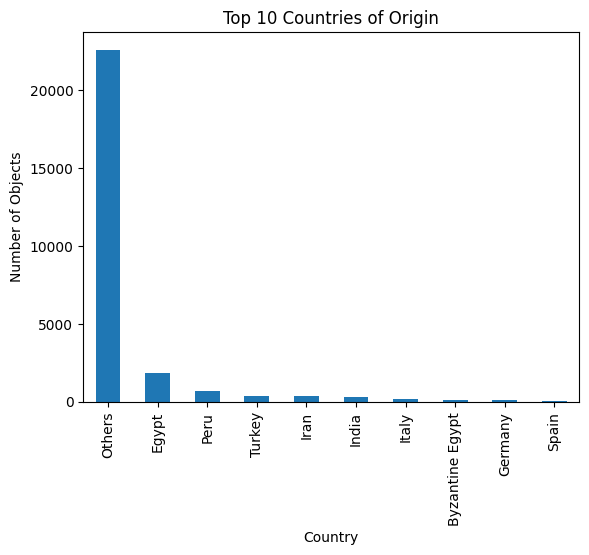

In [12]:
df['country'] = df['country'].replace('', 'Others').fillna('Others')
df['country'].value_counts().head(10).plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Number of Objects")
plt.title("Top 10 Countries of Origin")
plt.show()

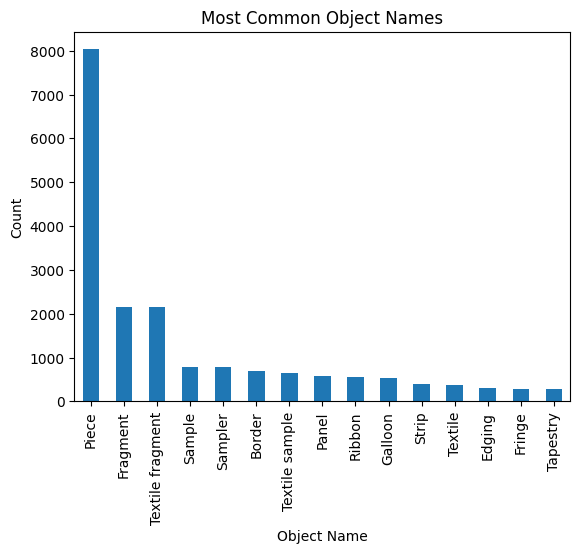

In [13]:
df['objectName'].value_counts().head(15).plot(kind='bar')
plt.xlabel("Object Name")
plt.ylabel("Count")
plt.title("Most Common Object Names")
plt.show()

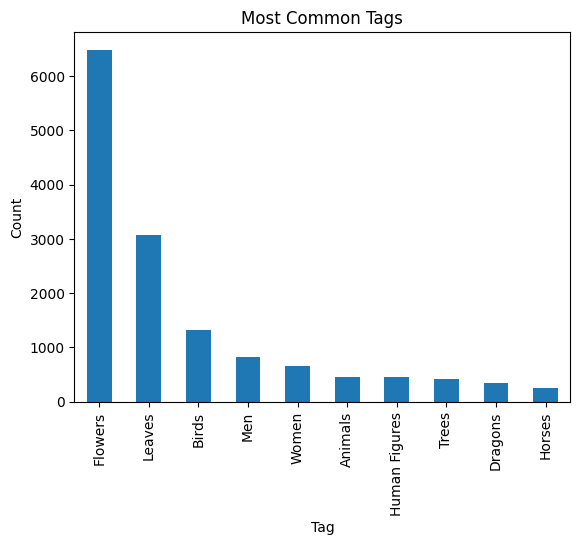

In [14]:
from collections import Counter
tag_terms = [tag['term'] for tags in df['tags'].dropna() for tag in tags]
pd.Series(Counter(tag_terms)).sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("Tag")
plt.ylabel("Count")
plt.title("Most Common Tags")
plt.show()

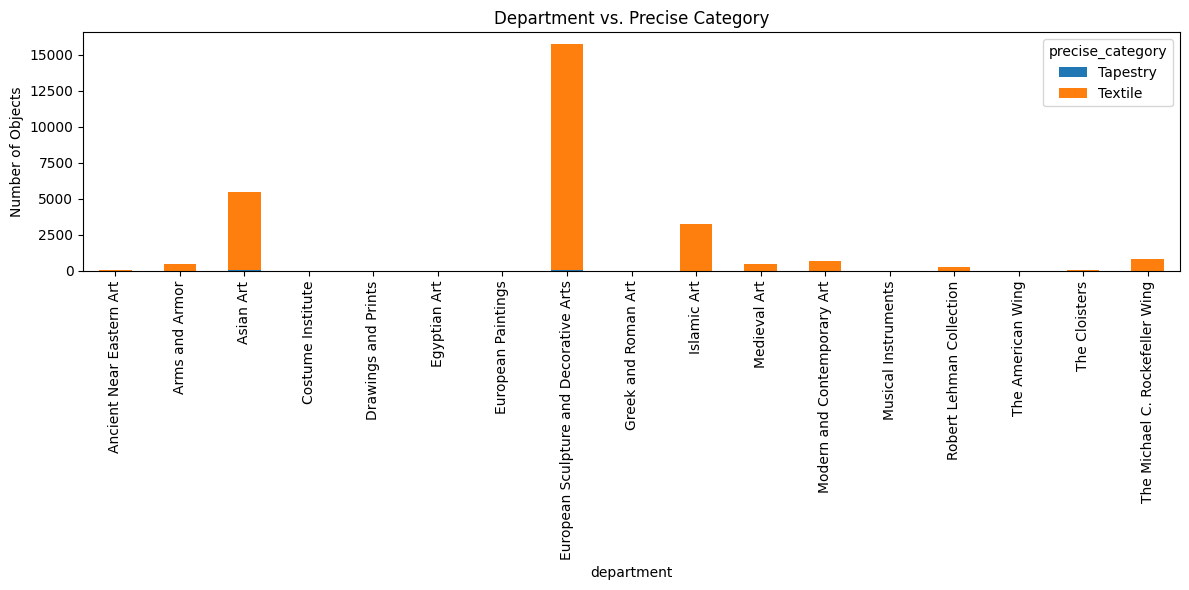

In [15]:
pd.crosstab(df['department'], df['precise_category']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel("Number of Objects")
plt.title("Department vs. Precise Category")
plt.tight_layout()
plt.show()

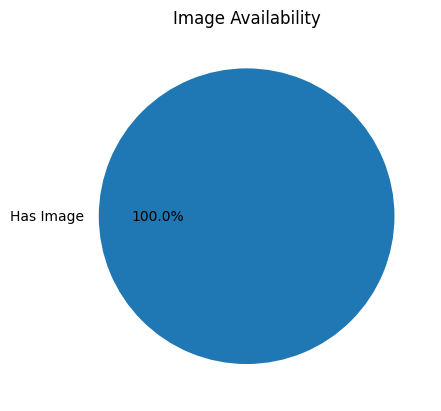

In [16]:
has_image = df['primaryImage'].apply(lambda x: bool(x)).value_counts()
has_image.plot(kind='pie', labels=['Has Image', 'No Image'], autopct='%1.1f%%')
plt.title("Image Availability")
plt.ylabel("")
plt.show()

In [17]:
print("==== DATASET SUMMARY ====")
print(f"Total objects: {len(df)}")
print(f"Unique departments: {df['department'].nunique()}")
print(f"Unique classifications: {df['classification'].nunique()}")
print(f"Unique object names: {df['objectName'].nunique()}")
print(f"Unique countries: {df['country'].replace('', 'Others').fillna('Others').nunique()}")
print(f"Objects with images: {df['primaryImage'].apply(bool).sum()} ({df['primaryImage'].apply(bool).mean()*100:.2f}%)")
print(f"Objects with tags: {df['tags'].notna().sum()} ({df['tags'].notna().mean()*100:.2f}%)")
print("\nTop 5 departments:")
print(df['department'].value_counts().head())
print("\nTop 5 classifications:")
print(df['classification'].value_counts().head())
print("\nTop 5 object names:")
print(df['objectName'].value_counts().head())
print("\nTop 5 countries:")
print(df['country'].replace('', 'Others').fillna('Others').value_counts().head())
print("=========================")

==== DATASET SUMMARY ====
Total objects: 27373
Unique departments: 17
Unique classifications: 125
Unique object names: 1214
Unique countries: 188
Objects with images: 27373 (100.00%)
Objects with tags: 11442 (41.80%)

Top 5 departments:
department
European Sculpture and Decorative Arts    15769
Asian Art                                  5504
Islamic Art                                3276
The Michael C. Rockefeller Wing             830
Modern and Contemporary Art                 657
Name: count, dtype: int64

Top 5 classifications:
classification
Textiles-Woven          9225
Textiles-Laces          4262
Textiles-Embroidered    3818
Textiles-Trimmings      1872
Textiles                1847
Name: count, dtype: int64

Top 5 object names:
objectName
Piece               8028
Fragment            2166
Textile fragment    2150
Sample               794
Sampler              787
Name: count, dtype: int64

Top 5 countries:
country
Others    22603
Egypt      1826
Peru        712
Turkey      392
Ira

In [18]:
# Show all unique country names and their counts, sorted
country_counts = df['country'].replace('', 'Others').fillna('Others').value_counts()
print("All country counts:")
print(country_counts)
print(f"\nTotal unique countries: {country_counts.shape[0]}")

All country counts:
country
Others                         22603
Egypt                           1826
Peru                             712
Turkey                           392
Iran                             352
                               ...  
probably Spain                     1
Afghanistan or Turkmenistan        1
Egypt or Turkey                    1
Eastern Iran or Khurasan           1
Sweden                             1
Name: count, Length: 188, dtype: int64

Total unique countries: 188


FISHY

In [19]:
# Filter for the objectID range 20,000–35,000
mask = (df["objectID"] >= 20000) & (df["objectID"] <= 35000)
df_range = df.loc[mask]

print("==== DATASET SUMMARY (objectID 20,000–35,000) ====")
print(f"Total objects: {len(df_range)}")
print(f"Unique departments: {df_range['department'].nunique()}")
print(f"Unique classifications: {df_range['classification'].nunique()}")
print(f"Unique object names: {df_range['objectName'].nunique()}")
print(f"Unique countries: {df_range['country'].replace('', 'Others').fillna('Others').nunique()}")
print(f"Objects with images: {df_range['primaryImage'].apply(bool).sum()} ({df_range['primaryImage'].apply(bool).mean()*100:.2f}%)")
print(f"Objects with tags: {df_range['tags'].notna().sum()} ({df_range['tags'].notna().mean()*100:.2f}%)")
print("\nTop 5 departments:")
print(df_range['department'].value_counts().head())
print("\nTop 5 classifications:")
print(df_range['classification'].value_counts().head())
print("\nTop 5 object names:")
print(df_range['objectName'].value_counts().head())
print("\nTop 5 countries:")
print(df_range['country'].replace('', 'Others').fillna('Others').value_counts().head())
print("=========================")

==== DATASET SUMMARY (objectID 20,000–35,000) ====
Total objects: 414
Unique departments: 3
Unique classifications: 50
Unique object names: 203
Unique countries: 64
Objects with images: 414 (100.00%)
Objects with tags: 78 (18.84%)

Top 5 departments:
department
Arms and Armor                            412
European Sculpture and Decorative Arts      1
The American Wing                           1
Name: count, dtype: int64

Top 5 classifications:
classification
Shafted Weapons    129
Swords              52
Helmets             48
Armor for Man       22
Armor Parts         17
Name: count, dtype: int64

Top 5 object names:
objectName
Partisan      35
Halberd       35
Smallsword    19
Fauchard      14
Glaive        12
Name: count, dtype: int64

Top 5 countries:
country
Italy      101
Germany     72
France      41
Japan       23
England     19
Name: count, dtype: int64


In [24]:
print("==== CLASSIFICATION ANALYSIS (ALL DATA) ====")
print(f"Unique classifications: {df['classification'].nunique()}")
print("\nTop 10 classifications:")
print(df['classification'].value_counts().head(30))
print("\nAll classifications and their counts:")
print(df['classification'].value_counts())
print("=========================")

==== CLASSIFICATION ANALYSIS (ALL DATA) ====
Unique classifications: 125

Top 10 classifications:
classification
Textiles-Woven                      9225
Textiles-Laces                      4262
Textiles-Embroidered                3818
Textiles-Trimmings                  1872
Textiles                            1847
Textiles-Printed                    1665
Textiles-Velvets                    1356
Textiles-Tapestries                  552
Textiles-Rugs                        435
Textiles-Costumes                    351
Textiles-Methods and Materials       231
Shafted Weapons                      131
Textiles-Painted and/or Printed      120
Textiles-Implements                  110
Textiles-Painted and Printed         100
Textiles-Featherwork                  99
Woodwork-Furniture                    94
Textiles-Ecclesiastical               83
                                      70
Textiles-Woven-Brocade                69
Textiles-Brocades                     68
Textiles-Sample Books     

In [26]:
import os

# Path to your downloaded images directory
images_dir = "MET_TEXTILES_BULLETPROOF_DATASET/images"

# List all files in the directory (only files, not subdirectories)
downloaded_images = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]
print(f"Total primary images downloaded: {len(downloaded_images)}")

# Optionally, show a sample of filenames
print("Sample image filenames:", downloaded_images[:10])

Total primary images downloaded: 27360
Sample image filenames: ['212672_Fragment_primary.jpg', '230549_Fragment_primary.jpg', '448109_Textile_Fragment_primary.jpg', '227209_Panel_primary.jpg', '227388_Piece_primary.jpg', '222046_Piece_primary.jpg', '443396_Textile_Fragment_primary.jpg', '480248_Textile_sample_primary.jpg', '218192_Border_primary.jpg', '224932_Fringe_primary.jpg']


In [29]:
import os

images_dir = "MET_TEXTILES_BULLETPROOF_DATASET/images"

# List all files in the directory (only files, not subdirectories)
downloaded_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

# Only consider primary images (filenames containing '_primary')
primary_files = [f for f in downloaded_files if '_primary' in f]

# Extract objectIDs from filenames (before first underscore)
primary_file_ids = set(f.split('_')[0] for f in primary_files)

# All objectIDs in your DataFrame that have a primary image URL
df_primary_ids = set(str(obj_id) for obj_id in df[df['primaryImage'].apply(bool)]['objectID'])

# Compare counts
print(f"Objects with primary image in JSON: {len(df_primary_ids)}")
print(f"Primary images downloaded (files): {len(primary_file_ids)}")

# Find missing downloads (objectIDs with image in JSON but no file)
missing = df_primary_ids - primary_file_ids
print(f"Missing primary image files: {len(missing)}")
if missing:
    print("Sample missing objectIDs:", list(missing)[:10])

# Find extra files (files not matching any objectID in JSON)
extra = primary_file_ids - df_primary_ids
print(f"Extra image files (not in JSON): {len(extra)}")
if extra:
    print("Sample extra filenames:", list(extra)[:10])

Objects with primary image in JSON: 27373
Primary images downloaded (files): 27360
Missing primary image files: 13
Sample missing objectIDs: ['310718', '158136', '53913', '445668', '454567', '67882', '314685', '217126', '202139', '467363']
Extra image files (not in JSON): 0


In [33]:
# Show a table with objectID, title, and clickable primary image link for missing images
missing_ids = list(missing)
missing_df = df[df['objectID'].astype(str).isin(missing_ids)][['objectID', 'title', 'primaryImage']]

from IPython.display import display, HTML

def make_link(url):
    if pd.isna(url) or not url:
        return ""
    return f'<a href="{url}" target="_blank">{url}</a>'

missing_df['primaryImage'] = missing_df['primaryImage'].apply(make_link)
display(HTML(missing_df.to_html(escape=False, index=False)))

In [36]:
print(f"Total unique departments: {df['department'].nunique()}")

Total unique departments: 17


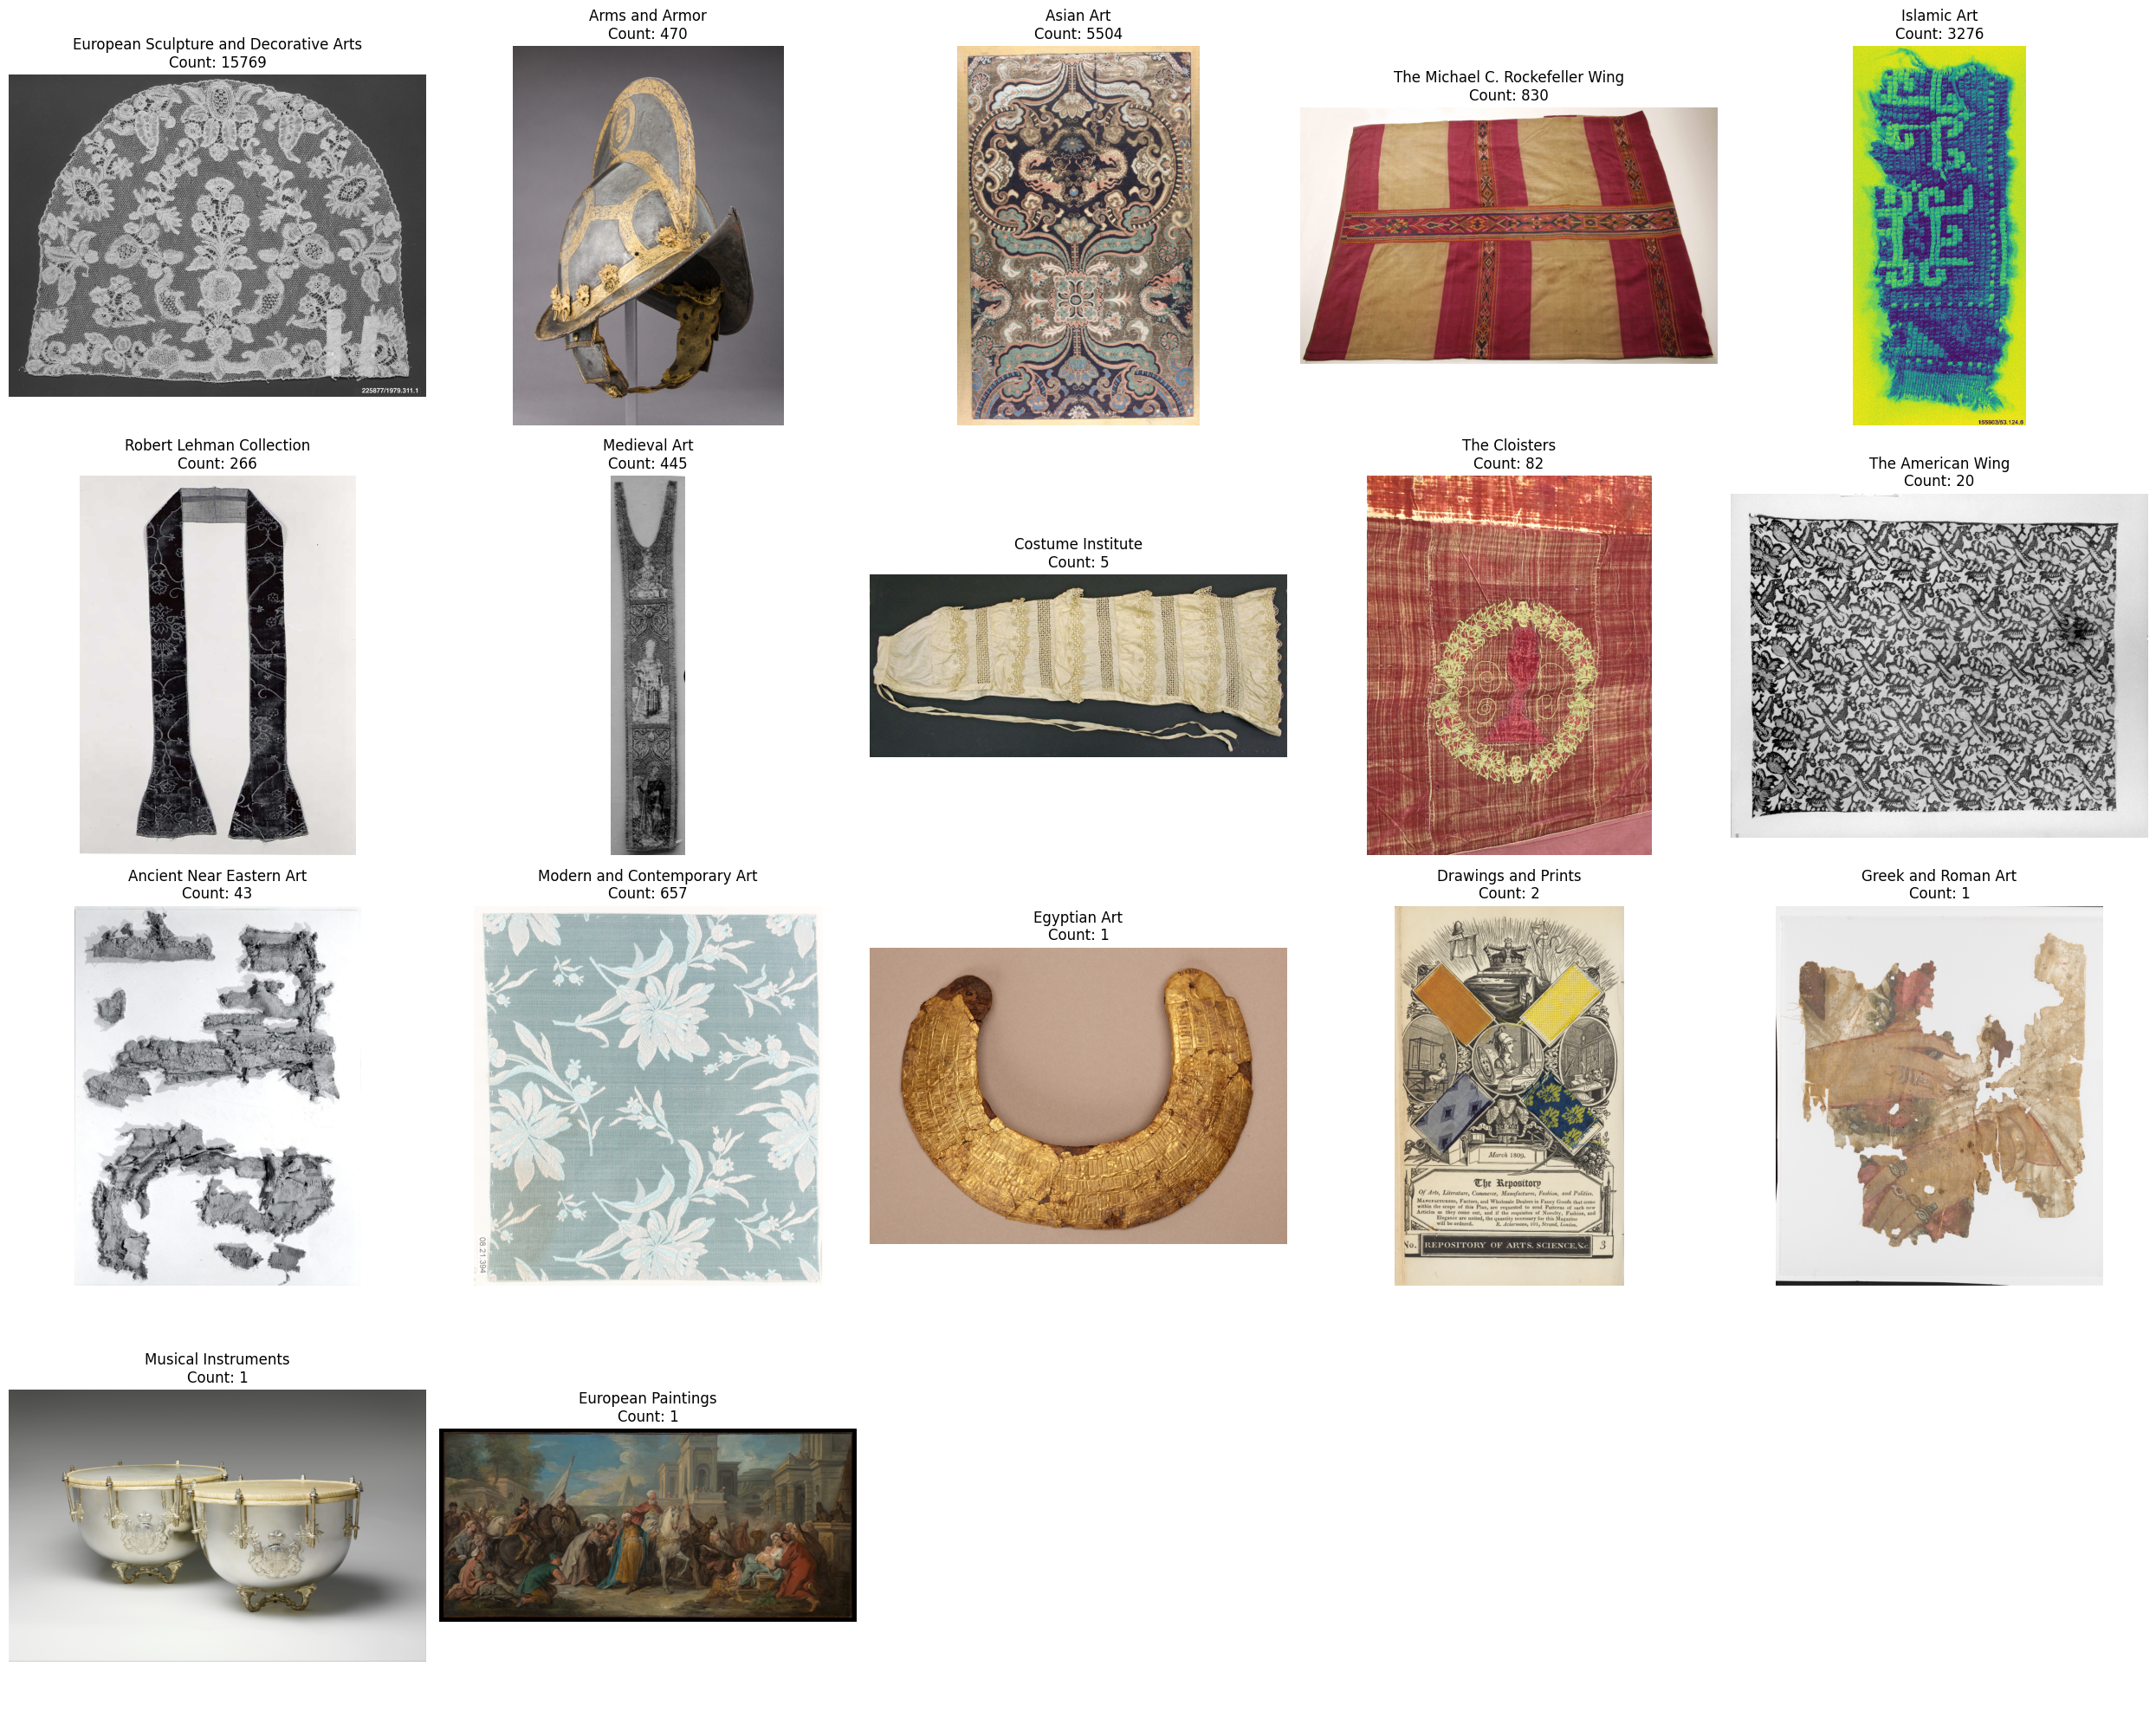

==== IMAGE GRID SUMMARY ====
Total departments: 17
Departments with at least one object with image: 17
Total images directory files: 27360


In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import math

images_dir = "MET_TEXTILES_BULLETPROOF_DATASET/images"

departments = df['department'].unique()
dept_counts = df['department'].value_counts()

n_depts = len(departments)
n_cols = math.ceil(math.sqrt(n_depts))
n_rows = math.ceil(n_depts / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for idx, (ax, dept) in enumerate(zip(axes, departments)):
    subset = df[(df['department'] == dept) & (df['primaryImage'].apply(bool))]
    if not subset.empty:
        row = subset.iloc[0]
        obj_id = str(row['objectID'])
        file_match = [f for f in os.listdir(images_dir) if f.startswith(obj_id) and '_primary' in f]
        if file_match:
            img_path = os.path.join(images_dir, file_match[0])
            img = mpimg.imread(img_path)
            ax.imshow(img)
        else:
            ax.text(0.5, 0.5, "No image", ha='center', va='center', fontsize=12)
        ax.set_title(f"{dept}\nCount: {dept_counts[dept]}")
        ax.axis('off')
    else:
        ax.text(0.5, 0.5, "No image", ha='center', va='center', fontsize=12)
        ax.set_title(f"{dept}\nCount: 0")
        ax.axis('off')

# Hide any unused subplots
for ax in axes[n_depts:]:
    ax.axis('off')

plt.tight_layout()
plt.show()
print("==== IMAGE GRID SUMMARY ====")
print(f"Total departments: {n_depts}")
print(f"Departments with at least one object with image: {(df.groupby('department')['primaryImage'].apply(lambda x: x.apply(bool).any())).sum()}")
print(f"Total images directory files: {len(os.listdir(images_dir))}")
print("============================")